In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
# load the dataset

import pandas as pd
import seaborn as sns
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.models import Model
import matplotlib.pyplot as plt

df = pd.read_csv("/content/gdrive/MyDrive/DataSet/housepricedata.csv")
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [5]:
dataset = df.values
dataset


array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [6]:
X = dataset[:,0:10]
Y = dataset[:,10]
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale


array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)
Epoch 1/100
32/32 [==============================] - 15s 16ms/step - loss: 0.6937 - accuracy: 0.5320 - val_loss: 0.6899 - val_accuracy: 0.5571
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.5304 - val_loss: 0.6856 - val_accuracy: 0.5799
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6839 - accuracy: 0.5445 - val_loss: 0.6819 - val_accuracy: 0.5890
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6794 - accuracy: 0.5694 - val_loss: 0.6782 - val_accuracy: 0.5982
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6774 - accuracy: 0.6007 - val_loss: 0.6746 - val_accuracy: 0.6210
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6691 - accuracy: 0.6302 - val_loss: 0.6710 - val_accuracy: 0.6621
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6671 - accuracy: 0.6741 

In [12]:
model.evaluate(X_test, Y_test)[1]


7/7 [==============================] - 0s 2ms/step - loss: 0.2672 - accuracy: 0.8995


0.8995434045791626

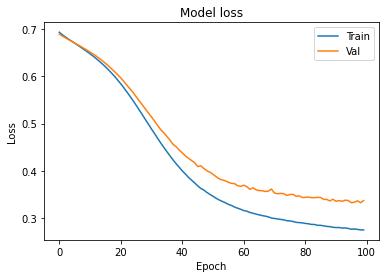

In [9]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Epoch 1/100
32/32 [==============================] - 1s 14ms/step - loss: 0.5294 - accuracy: 0.7046 - val_loss: 0.4044 - val_accuracy: 0.8584
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3198 - accuracy: 0.8798 - val_loss: 0.3770 - val_accuracy: 0.8539
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3011 - accuracy: 0.8648 - val_loss: 0.3533 - val_accuracy: 0.8721
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2784 - accuracy: 0.8827 - val_loss: 0.3294 - val_accuracy: 0.8676
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.2560 - accuracy: 0.8970 - val_loss: 0.3911 - val_accuracy: 0.8813
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2798 - accuracy: 0.8877 - val_loss: 0.3456 - val_accuracy: 0.8767
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2175 - accuracy: 0.9146 - val_loss: 0.2976 - val_accuracy: 0.8813
Epoch 8/100


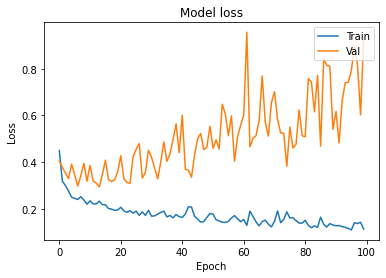

KeyError: ignored

In [14]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(hist_2.history['acc'])
plt.plot(hist_2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [16]:
from keras.layers import Dropout
from keras import regularizers
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 16ms/step - loss: 21.1124 - accuracy: 0.5779 - val_loss: 3.8863 - val_accuracy: 0.7945
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 2.5030 - accuracy: 0.8379 - val_loss: 0.7283 - val_accuracy: 0.8584
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6261 - accuracy: 0.8692 - val_loss: 0.5455 - val_accuracy: 0.8676
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5080 - accuracy: 0.8654 - val_loss: 0.6580 - val_accuracy: 0.7534
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5044 - accuracy: 0.8629 - val_loss: 0.5135 - val_accuracy: 0.8630
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.4739 - accuracy: 0.8896 - val_loss: 0.5049 - val_accuracy: 0.8721
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.4883 - accuracy: 0.8645 - val_loss: 0.5657 - val_accuracy: 0.8311
Epoch 8/100

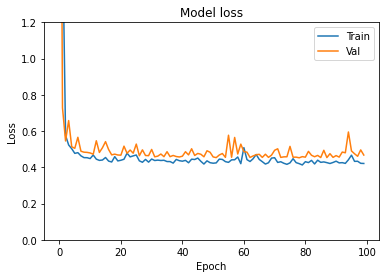

In [17]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()